In [1]:
import pandas as pd                            # numbers
import numpy as np                             # dataset
import matplotlib.pyplot as plt                # visualisation
%matplotlib inline                             
import seaborn as sns
pd.set_option("display.max_rows",None)        # display all rows and column
pd.set_option("display.max_columns",None)     # display all rows and column
import warnings                              
warnings.filterwarnings('ignore')             # warnings

In [2]:
df=pd.read_csv("Datasets-main/titanic-training-data.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median1=df['Age'].median()
median1

28.0

In [8]:
df['Age']=df['Age'].replace(np.nan,median1)

In [9]:
mode1=df['Embarked'].mode().values[0]
mode1

'S'

In [10]:
df['Embarked']=df['Embarked'].replace(np.nan,median1)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
df=df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [13]:
duplicate=df.duplicated()
print(duplicate.sum())

116


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.shape

(891, 8)

<AxesSubplot:xlabel='Age'>

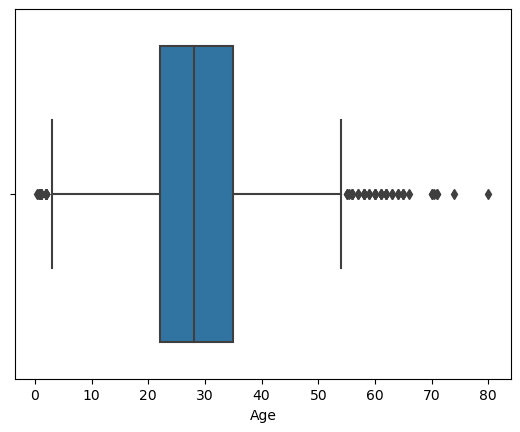

In [16]:
sns.boxplot(x="Age",data=df)

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [18]:
lowage,uppage=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uppage,uppage,df['Age'])
df['Age']=np.where(df['Age']<lowage,lowage,df['Age'])

<AxesSubplot:xlabel='Age'>

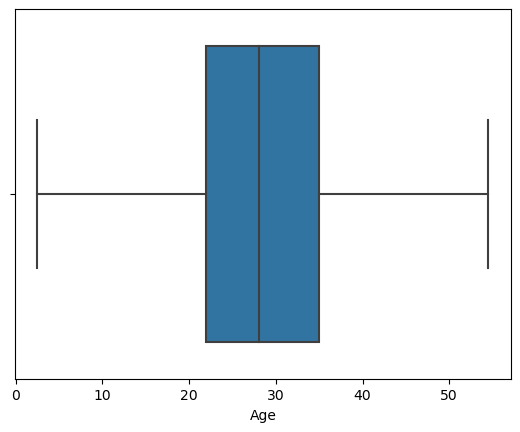

In [19]:
sns.boxplot(x="Age",data=df)

<AxesSubplot:xlabel='Fare'>

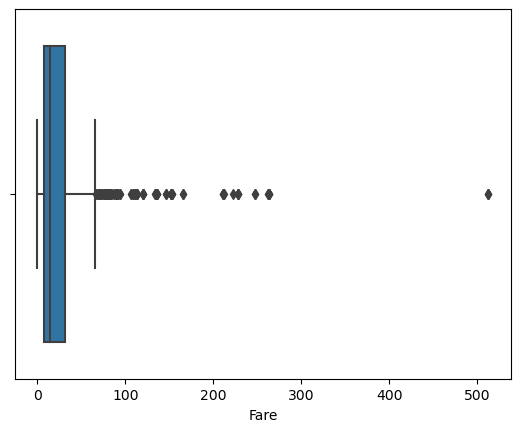

In [20]:
sns.boxplot(x="Fare",data=df)

<AxesSubplot:xlabel='Fare'>

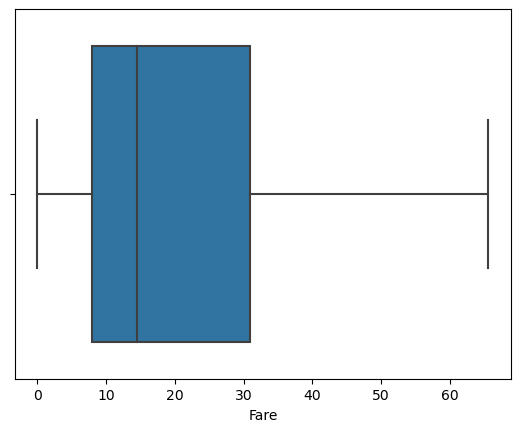

In [21]:
lowfare,uppfare=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>uppfare,uppfare,df['Fare'])
df['Fare']=np.where(df['Fare']<lowfare,lowfare,df['Fare'])
sns.boxplot(x="Fare",data=df)

In [22]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [23]:
df.shape

(891, 12)

In [24]:
df.dtypes

Survived           int64
Pclass             int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Sex_female         uint8
Sex_male           uint8
Embarked_28.0      uint8
Embarked_C         uint8
Embarked_Q         uint8
Embarked_S         uint8
dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
Y=df[['Survived']]
X=df.drop(['Survived'],axis=1)

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
model_log=LogisticRegression()

In [28]:
model_log.fit(X_train,Y_train)

LogisticRegression()

In [29]:
model_log.score(X_train,Y_train)

0.8089887640449438

In [30]:
model_log.score(X_test,Y_test)

0.7723880597014925

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<AxesSubplot:>

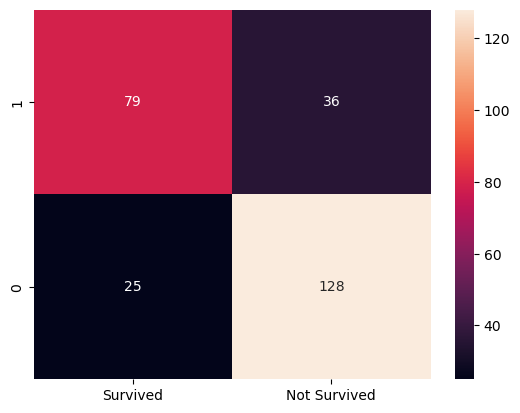

In [32]:
predictions=model_log.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions, labels=[1,0])
df_cm = pd.DataFrame (cm, index =[i for i in ['1','0']], columns = [i for i in ['Survived', 'Not Survived']])
sns.heatmap(df_cm, annot=True, fmt='g')

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_dtc= DecisionTreeClassifier(max_depth=1)

In [35]:
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=1)

In [36]:
model_dtc.score(X_train,Y_train)

0.8009630818619583

In [37]:
model_dtc.score(X_test,Y_test)
 

0.753731343283582

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
model_bcl=BaggingClassifier(n_estimators=145, base_estimator=model_dtc)

In [40]:
model_bcl.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                  n_estimators=145)

In [41]:
model_bcl.score(X_train,Y_train)

0.8009630818619583

In [42]:
model_bcl.score(X_test,Y_test)

0.753731343283582

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_abc=AdaBoostClassifier(n_estimators=22)
model_gbc=GradientBoostingClassifier(max_depth=1,n_estimators=25)
model_rfc=RandomForestClassifier(n_estimators=50,max_depth=2)

In [45]:
model_abc.fit(X_train,Y_train)
model_gbc.fit(X_train,Y_train)
model_rfc .fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, n_estimators=50)

In [46]:
model_abc.score(X_train,Y_train)

0.826645264847512

In [47]:
model_abc.score(X_test,Y_test)

0.7873134328358209

In [48]:
model_gbc.score(X_train,Y_train)

0.8009630818619583

In [49]:
model_gbc.score(X_test,Y_test)

0.753731343283582

In [50]:
model_rfc.score(X_train,Y_train)

0.8009630818619583

In [51]:
model_rfc.score(X_test,Y_test)

0.753731343283582

In [52]:
from sklearn.svm import SVC

In [53]:
model_svc=SVC(kernel='linear',C=2.5)

In [54]:
model_svc.fit(X_train,Y_train)

SVC(C=2.5, kernel='linear')

In [55]:
model_svc.score(X_train,Y_train)

0.8009630818619583

In [56]:
model_svc.score(X_test,Y_test)

0.753731343283582